# About Dataset

https://www.kaggle.com/datasets/sidhus/crab-age-prediction/data

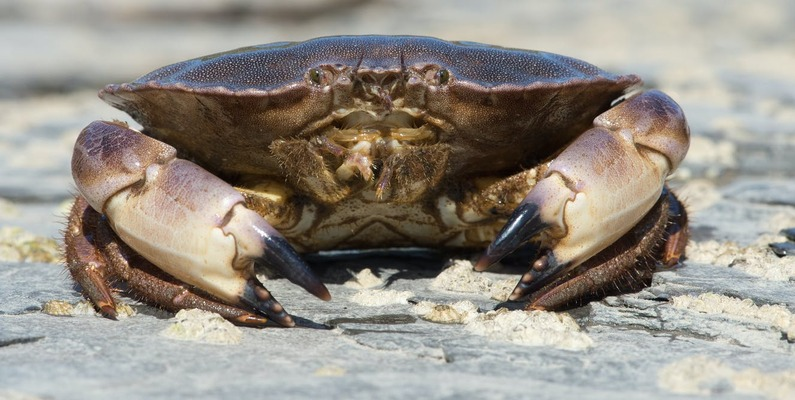


The dataset is used to estimate the age of the crab based on the physical attributes. Its a great starting point for classical regression analysis and feature engineering and understand the impact of feature engineering in Data Science domain.

Crab is very tasty and many countries of the world import huge amount of crabs for consumption every year. The main benefits of crab farming are, labor cost is very low, production cost is comparatively lower and they grow very fast. Commercial crab farming business is developing the lifestyle of the people of coastal areas. By proper care and management we can earn more from crab farming business than shrimp farming. You can raise mud crabs in two systems. Grow out farming and fattening systems.

For a commercial crab farmer knowing the right age of the crab helps them decide if and when to harvest the crabs. Beyond a certain age, there is negligible growth in crab's physical characteristics and hence, it is important to time the harvesting to reduce cost and increase profit. The goal of the dataset is:

Exploratory data analysis - Understand how different physical features change with age.
Feature Engineering - Define new features using a combination of given data points to help improve model accuracy.
Regression Model - Build a regression model to predict the age of the Crab.

The dataset contains physical attributes of farmed Crabs.


Sex
Gender of the Crab - Male, Female and Indeterminate.


Length
Length of the Crab (in Feet; 1 foot = 30.48 cms)


Diameter
Diameter of the Crab (in Feet; 1 foot = 30.48 cms)


Height
Height of the Crab (in Feet; 1 foot = 30.48 cms)


Weight
Weight of the Crab (in ounces; 1 Pound = 16 ounces)


Shucked Weight
Weight without the shell (in ounces; 1 Pound = 16 ounces)


Viscera Weight
is weight that wraps around your abdominal organs deep inside body (in ounces; 1 Pound = 16 ounces)


Shell Weight
Weight of the Shell (in ounces; 1 Pound = 16 ounces)


Age
Age of the Crab (in months)

# Libraries Import

In [103]:
import math
import re
import os

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.linear_model import Lasso, Ridge

In [108]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [109]:
import pickle

# Dataset Import

In [110]:
df = pd.read_csv(r"CrabAgePrediction.csv")

# Dataset Exploration

In [111]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [112]:
pd.concat([df.head(5), df.tail(5)])

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6
3892,I,0.7875,0.6125,0.2125,4.068153,1.502523,1.346601,1.417475,8


In [113]:
df.describe(include='all')

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,NaN,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,NaN,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,NaN,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,NaN,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,NaN,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


# Dataset Preprocessing

unique values

In [115]:
pd.DataFrame([ df.nunique(), df.dtypes ])

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,3,134,111,51,2343,1482,867,907,28
1,object,float64,float64,float64,float64,float64,float64,float64,int64


features type

In [116]:
TARGET = 'Age'
INPUT_FEATURES = ['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight','Viscera Weight', 'Shell Weight',]
CATEGORICAL_FEATURES = ['Sex']
NUMERICAL_FEATURES =['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight','Viscera Weight', 'Shell Weight']

In [117]:
df[CATEGORICAL_FEATURES] = df[CATEGORICAL_FEATURES].astype(str)
df[NUMERICAL_FEATURES] = df[NUMERICAL_FEATURES].astype(float)
df[TARGET] = df[TARGET].astype(float)

In [118]:
pd.DataFrame([ df.nunique(), df.dtypes ])

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,3,134,111,51,2343,1482,867,907,28
1,object,float64,float64,float64,float64,float64,float64,float64,float64


null values

In [119]:
100.0 * df.isna().sum() / len(df)

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Weight            0.0
Shucked Weight    0.0
Viscera Weight    0.0
Shell Weight      0.0
Age               0.0
dtype: float64

In [120]:
df.dropna(inplace=True)

duplicates

In [121]:
df.duplicated().sum()

np.int64(0)

In [122]:
df.drop_duplicates(inplace=True)

In [123]:
df.duplicated().sum()

np.int64(0)

# Dataset Visualization

In [124]:
plt.style.use(plt.style.available[12])

Distribuation

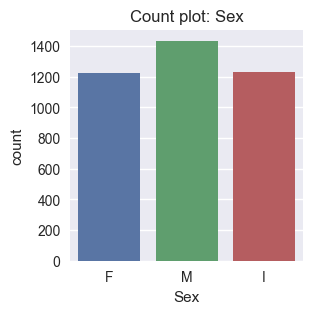

In [125]:
for cat_feature in CATEGORICAL_FEATURES:
    plt.figure(figsize=(3,3))
    plt.title(f"Count plot: {cat_feature}")
    sns.countplot(df, x=cat_feature, hue=cat_feature,legend=False)
    plt.show()

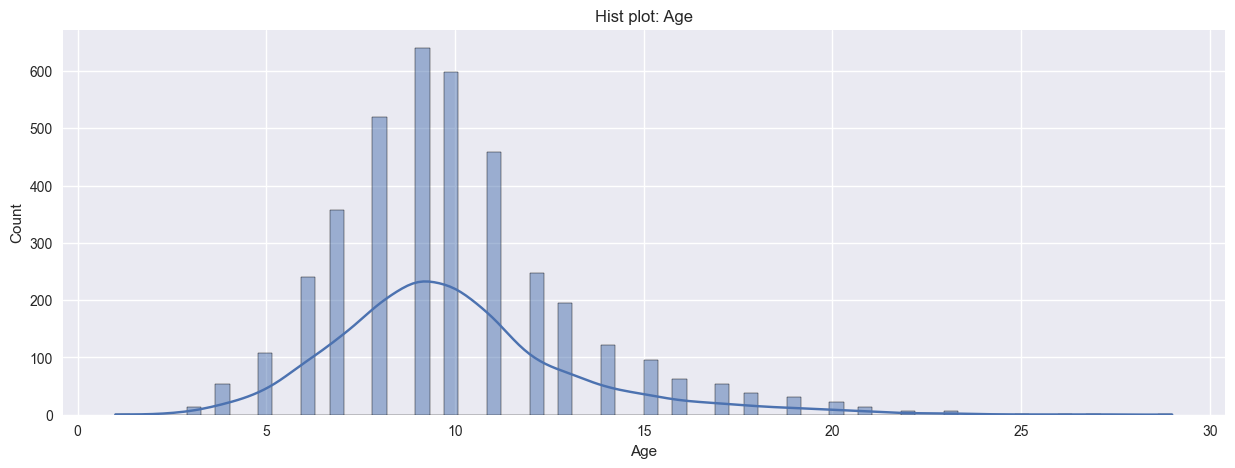

In [126]:
plt.figure(figsize=(15,5))
plt.title(f"Hist plot: {TARGET}")
sns.histplot(df, x=TARGET, kde=True)
plt.show()

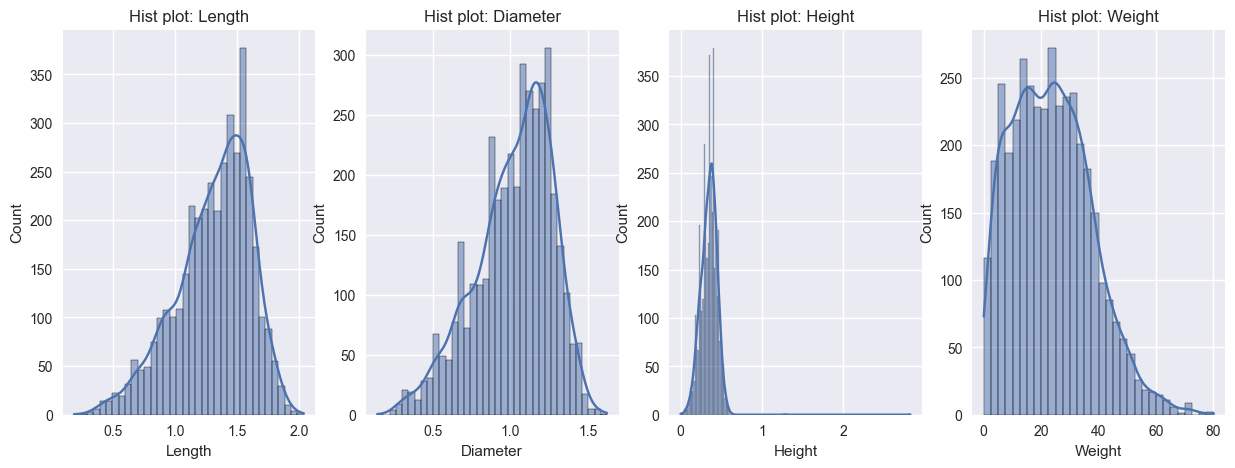

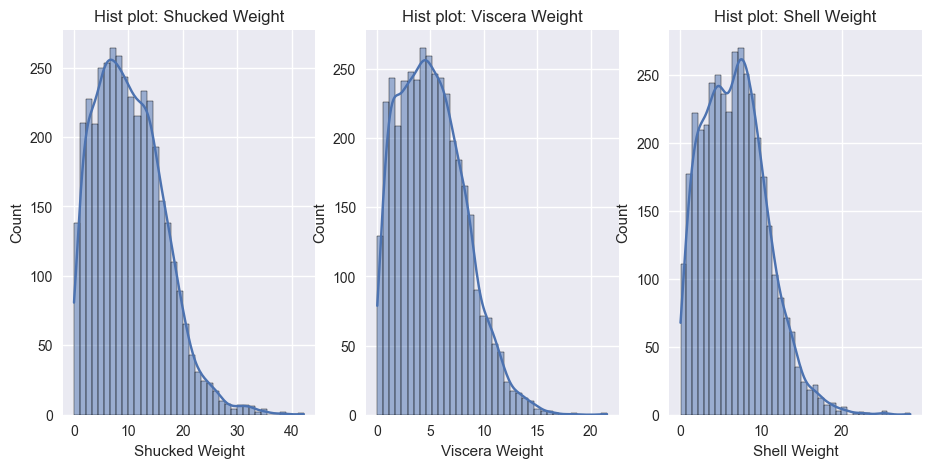

In [127]:
ROW_WIDTH = 4 
temp = 0

for num_feature in NUMERICAL_FEATURES:
    if temp == 0:
        plt.figure(figsize=(15,5))

    plt.subplot(1,ROW_WIDTH, temp + 1)
    plt.title(f"Hist plot: {num_feature}")
    sns.histplot(df, x=num_feature, kde=True)

    if temp == ROW_WIDTH - 1:
        plt.show()

    temp = (temp + 1) % ROW_WIDTH

if temp != ROW_WIDTH - 1:
    plt.show()

scatter with output

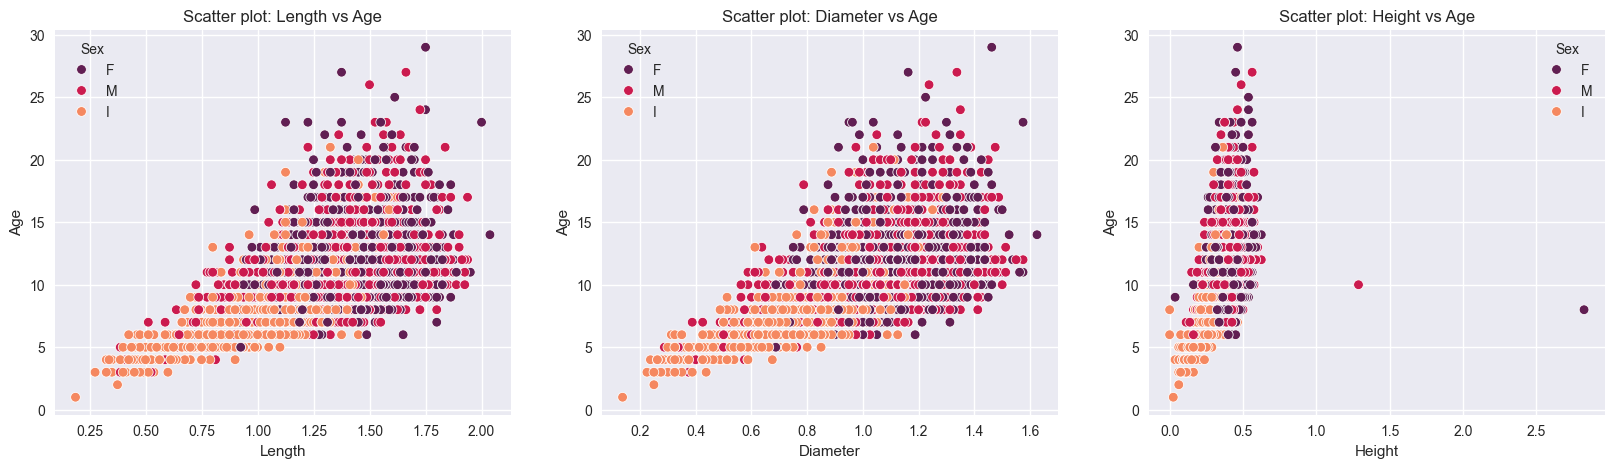

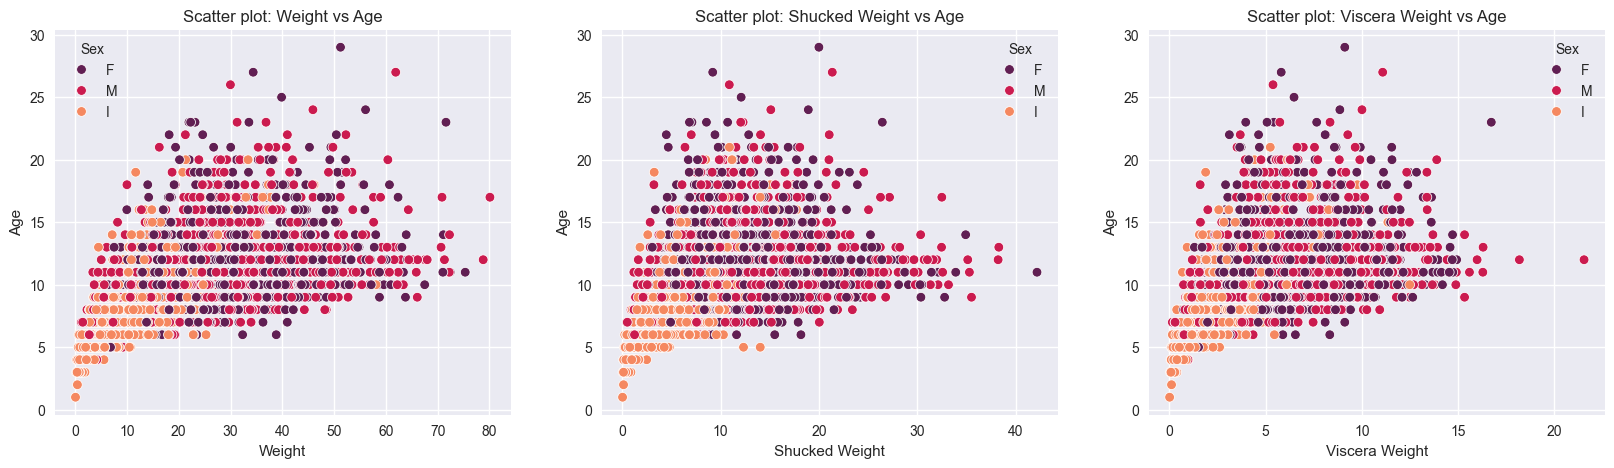

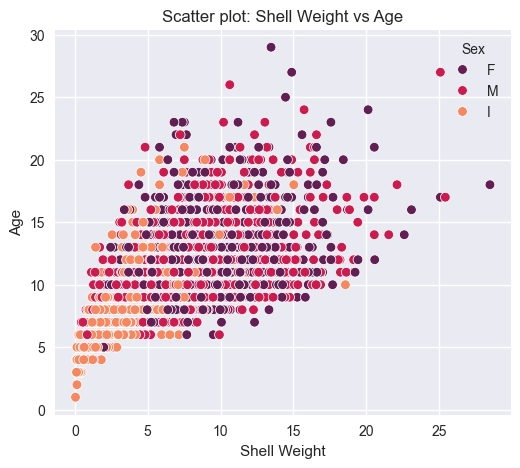

In [128]:
ROW_WIDTH = 3 
temp = 0

for num_feature in NUMERICAL_FEATURES:
    if temp == 0:
        plt.figure(figsize=(20,5))

    plt.subplot(1,ROW_WIDTH, temp + 1)
    plt.title(f"Scatter plot: {num_feature} vs {TARGET}")
    sns.scatterplot(df, x=num_feature, y=TARGET, hue=CATEGORICAL_FEATURES[0], palette='rocket')

    if temp == ROW_WIDTH - 1:
        plt.show()

    temp = (temp + 1) % ROW_WIDTH

if temp != ROW_WIDTH - 1:
    plt.show()    

bar plot

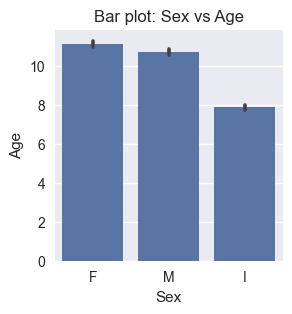

In [129]:
ROW_WIDTH = 3 
temp = 0

for cat_feature in CATEGORICAL_FEATURES:
    if temp == 0:
        plt.figure(figsize=(10,3))

    plt.subplot(1,ROW_WIDTH, temp + 1)
    plt.title(f"Bar plot: {cat_feature} vs {TARGET}")
    sns.barplot(df, x=cat_feature, y=TARGET)

    if temp == ROW_WIDTH - 1:
        plt.show()

    temp = (temp + 1) % ROW_WIDTH

if temp != ROW_WIDTH - 1:
    plt.show()    

# Outliers

In [130]:
def plot_box(features, hue):
    ROW_WIDTH = 4
    temp = 0

    for num_feature in features:
        if temp == 0:
            plt.figure(figsize=(15,5))

        plt.subplot(1,ROW_WIDTH, temp + 1)
        plt.title(f"Box plot: {num_feature}")
        sns.boxplot(df, x=num_feature, hue=hue, palette='rocket')

        if temp == ROW_WIDTH - 1:
            plt.show()

        temp = (temp + 1) % ROW_WIDTH

    if temp != ROW_WIDTH - 1:
        plt.show()    

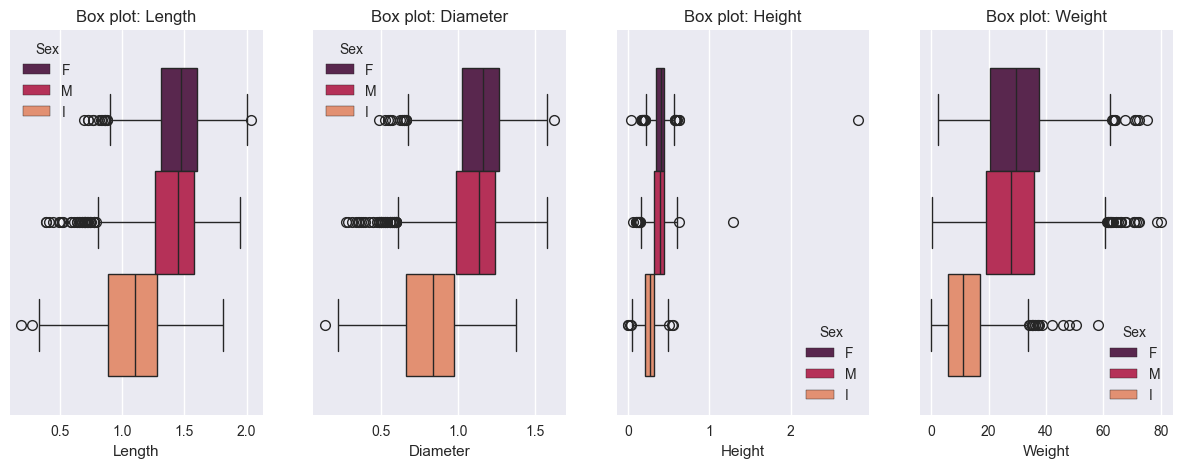

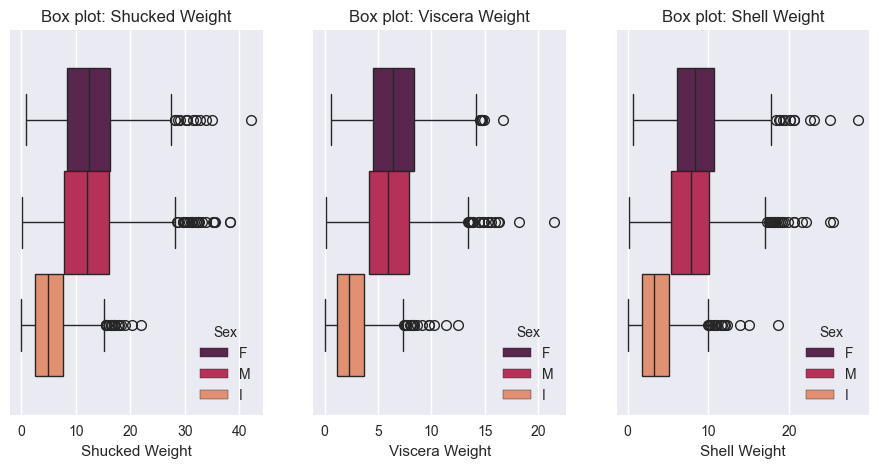

In [131]:
plot_box(NUMERICAL_FEATURES, CATEGORICAL_FEATURES[0])

In [132]:
def IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    IQR = Q3 - Q1

    min_v = Q1 - 1.5 * IQR
    max_v = Q3 + 1.5 * IQR

    return series.clip(lower=min_v, upper=max_v)


In [133]:
gender = CATEGORICAL_FEATURES[0]

for num_feature in NUMERICAL_FEATURES:
    for gender_category in set(df[gender].values):
        mask = df[gender] == gender_category
        df.loc[mask, num_feature] = IQR(df.loc[mask, num_feature])

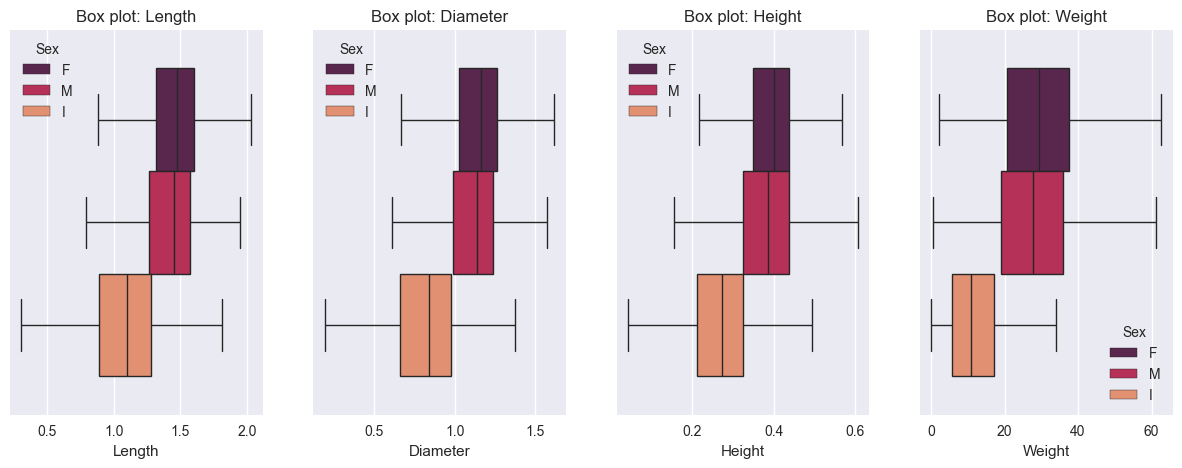

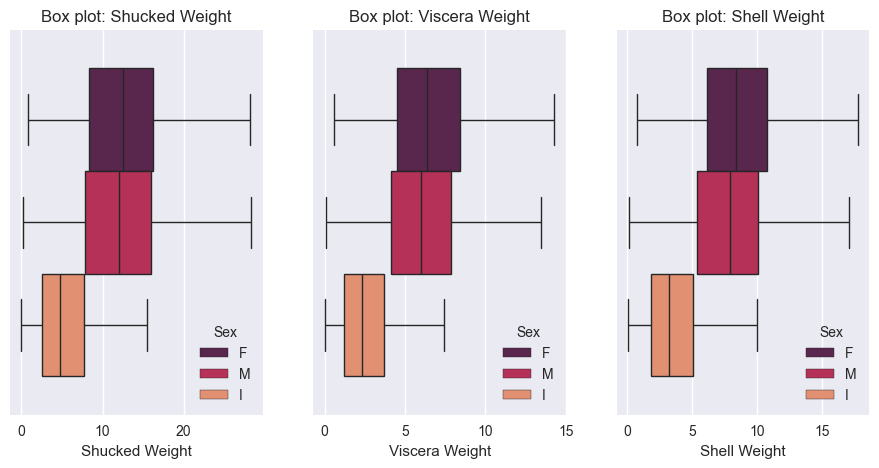

In [134]:
plot_box(NUMERICAL_FEATURES, CATEGORICAL_FEATURES[0])

C:\Users\yosef\AppData\Local\Temp\ipykernel_13048\2638417181.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x=num_feature, hue=hue, palette='rocket')


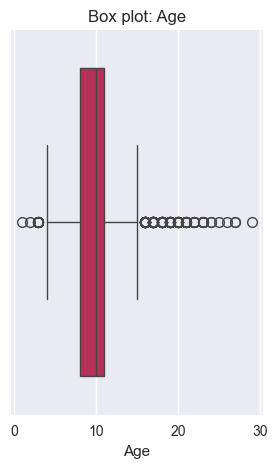

In [135]:
plot_box([TARGET],None)

# Feauter Engineering

In [136]:
INPUT_FEATURES

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight']

sqrt

In [137]:
for base_feature in  ['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']:
    new_feature_name = f'sqrt of |{base_feature}|'

    df[new_feature_name] = df[base_feature].apply(lambda x: math.sqrt( abs(x) ))

    if new_feature_name not in INPUT_FEATURES:
        NUMERICAL_FEATURES.append(new_feature_name)
        INPUT_FEATURES.append(new_feature_name)

square

In [138]:
for base_feature in ['Height']:
    new_feature_name = f'{base_feature} ^ 2'

    df[new_feature_name] = df[base_feature].apply(lambda x: x*x )

    if new_feature_name not in INPUT_FEATURES:
        NUMERICAL_FEATURES.append(new_feature_name)
        INPUT_FEATURES.append(new_feature_name)

crab area

In [139]:
new_feature_name = f'crab area'
df[new_feature_name] = df['Diameter'].apply(lambda x: 4 * math.pi * x**2 )

if new_feature_name not in INPUT_FEATURES:
    NUMERICAL_FEATURES.append(new_feature_name)
    INPUT_FEATURES.append(new_feature_name)

In [140]:
NUMERICAL_FEATURES

['Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'sqrt of |Weight|',
 'sqrt of |Shucked Weight|',
 'sqrt of |Viscera Weight|',
 'sqrt of |Shell Weight|',
 'Height ^ 2',
 'crab area']

crab clynder size

In [141]:
new_feature_name = f'crab clynder size'
df[new_feature_name] = df['crab area'] * df['Height']

if new_feature_name not in INPUT_FEATURES:
    NUMERICAL_FEATURES.append(new_feature_name)
    INPUT_FEATURES.append(new_feature_name)

crab sphere size

In [142]:
new_feature_name = f'crab sphere size'
df[new_feature_name] = df['Diameter'].apply(lambda x: (4/3) * math.pi * x**3 )

if new_feature_name not in INPUT_FEATURES:
    NUMERICAL_FEATURES.append(new_feature_name)
    INPUT_FEATURES.append(new_feature_name)

# Correlation Matrix

<Axes: title={'center': 'Input Features Correlation'}>

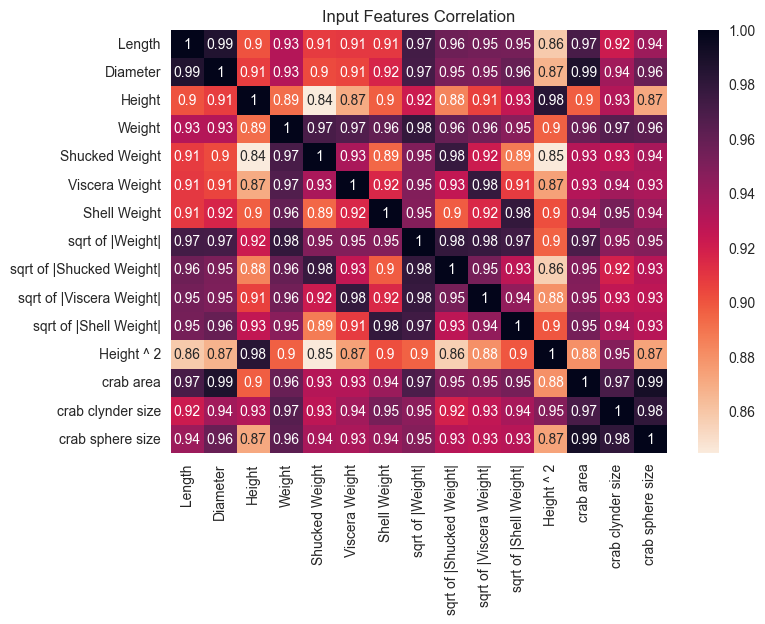

In [ ]:
plt.title("Input Features Correlation")

sns.heatmap( 
    df[NUMERICAL_FEATURES].corr(),
    annot=True,
    cmap='rocket_r'
    )

<Axes: title={'center': 'Input Features vs Target Correlation'}>

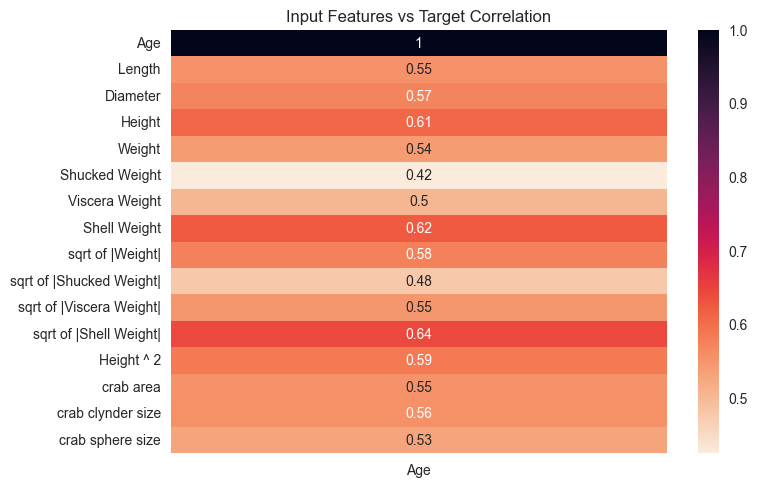

In [144]:
plt.title("Input Features vs Target Correlation")

sns.heatmap( 
    df[ [TARGET] + NUMERICAL_FEATURES].corr().iloc[:,[0]],
    annot=True,
    cmap='rocket_r'
    )

# Encoding & Scaling

In [145]:
trainable_df = df.copy()

In [146]:
trainable_df = pd.get_dummies(trainable_df, columns=CATEGORICAL_FEATURES, drop_first=False, dtype=int)

In [147]:
min_max_scaller = MinMaxScaler()

min_max_scaller.fit(trainable_df[NUMERICAL_FEATURES])

MinMaxScaler()

In [148]:
trainable_df.loc[:,NUMERICAL_FEATURES] = min_max_scaller.transform(trainable_df[NUMERICAL_FEATURES])

In [149]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,sqrt of |Weight|,sqrt of |Shucked Weight|,sqrt of |Viscera Weight|,sqrt of |Shell Weight|,Height ^ 2,crab area,crab clynder size,crab sphere size
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9.0,4.963438,3.511699,2.363229,2.597534,0.170156,17.349445,7.156646,6.795199
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6.0,2.323915,1.515358,1.172583,1.248688,0.045156,5.309292,1.128224,1.150347
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6.0,2.819935,1.797733,1.265601,1.662551,0.062500,7.547676,1.886919,1.949816
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10.0,3.671537,2.179115,1.510674,2.290122,0.062500,9.897980,2.474495,2.928153
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6.0,2.627376,1.859742,1.219979,1.304212,0.045156,5.515459,1.172035,1.217997


In [150]:
trainable_df.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,sqrt of |Weight|,sqrt of |Shucked Weight|,sqrt of |Viscera Weight|,sqrt of |Shell Weight|,Height ^ 2,crab area,crab clynder size,crab sphere size,Sex_F,Sex_I,Sex_M
0,0.655797,0.688596,0.655556,0.393064,0.435251,0.390268,0.379310,9.0,0.615823,0.649056,0.613009,0.597365,0.460150,0.520009,0.378013,0.381389,1,0,0
1,0.336957,0.320175,0.300000,0.085458,0.080231,0.095333,0.085806,6.0,0.271830,0.261497,0.287777,0.260416,0.118269,0.149047,0.058672,0.063138,0,0,1
2,0.423913,0.407895,0.366667,0.126261,0.113326,0.111221,0.153970,6.0,0.336473,0.316316,0.313185,0.363801,0.165705,0.218013,0.098862,0.108211,0,1,0
3,0.503623,0.486842,0.366667,0.214666,0.166980,0.158888,0.294306,10.0,0.447457,0.390355,0.380129,0.520572,0.165705,0.290426,0.129987,0.163369,1,0,0
4,0.336957,0.328947,0.300000,0.109487,0.121349,0.103277,0.093825,6.0,0.311378,0.328354,0.300723,0.274286,0.118269,0.155399,0.060993,0.066952,0,1,0


# Dataset Splitting

In [151]:
X_train,X_test, y_train, y_test = train_test_split( 
    trainable_df.drop(TARGET, axis=1), 
    trainable_df.loc[:, TARGET],
    test_size=0.3,
    random_state=41 
  )

In [152]:
print(f"{X_train.shape= }")
print(f"{y_train.shape= }")
print(f"{X_test.shape= }")
print(f"{y_test.shape= }")

X_train.shape= (2725, 18)
y_train.shape= (2725,)
X_test.shape= (1168, 18)
y_test.shape= (1168,)


# Model Definition & Training

In [153]:
CACHE_MODELS_DIR_NAME = 'models_cache' 
os.makedirs(CACHE_MODELS_DIR_NAME, exist_ok=True)

In [154]:
class CustomModel:
    def __init__(self, name, model, extra_train_param = None ):

        self.name = str(name)
        self.model = model
        self.extra_train_param = extra_train_param

        self.y_train_hat = None
        self.y_test_hat = None
        
        self.load()


    def fit(self, x_train, y_train):
        if self.trained == False:
            
            if self.extra_train_param is None:
                self.model.fit(x_train, y_train)
            else:
                self.model.fit(x_train, y_train, **self.extra_train_param)

            self.trained = True
            self.save()
    
    def prdict_on_train(self, x_train):
        if self.y_train_hat is None:
            self.y_train_hat = self.model.predict(x_train)
    
    def prdict_on_test(self, x_test):
        if self.y_test_hat is None:
            self.y_test_hat = self.model.predict(x_test)
    
    def save(self):
        file_name = re.sub('', '', str(self.name).lower())
        file_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '.pickle'
        with open(file_path, 'wb') as f:
           pickle.dump(self.model, f)        

    def load(self):
        file_name = re.sub('', '', str(self.name).lower())
        file_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '.pickle'

        if os.path.exists(file_path):
            with open(file_path, 'rb') as f:
                self.model = pickle.load(f)
            self.trained = True
        else:
            self.trained = False

In [155]:
models_list = []

models_list.append(CustomModel("Linear Regression", LinearRegression()))

models_list.append(CustomModel("Lasso alpha=0.05", Lasso(alpha=0.05)))
models_list.append(CustomModel("Lasso alpha=0.1", Lasso(alpha=0.1)))
# models_list.append(CustomModel("Lasso alpha=0.5", Lasso(alpha=0.5)))
# models_list.append(CustomModel("Lasso alpha=2", Lasso(alpha=5)))

models_list.append(CustomModel("Ridge alpha=0.05", Ridge(alpha=0.05)))
models_list.append(CustomModel("Ridge alpha=0.1", Ridge(alpha=0.1)))
# models_list.append(CustomModel("Ridge alpha=0.5", Ridge(alpha=0.5)))
# models_list.append(CustomModel("Ridge alpha=2", Ridge(alpha=5)))

models_list.append(CustomModel("SVC linear kernel", SVR(kernel='linear')))
models_list.append(CustomModel("SVC poly kernel", SVR(kernel='poly')))
models_list.append(CustomModel("SVC rbf kernel", SVR(kernel='rbf')))

models_list.append(CustomModel("KNN k=3", KNeighborsRegressor(n_neighbors=3)))
models_list.append(CustomModel("KNN k=5", KNeighborsRegressor(n_neighbors=5)))
models_list.append(CustomModel("KNN k=7", KNeighborsRegressor(n_neighbors=7)))

models_list.append(CustomModel("Decision Tree max-depth=3", DecisionTreeRegressor(max_depth=3)))
models_list.append(CustomModel("Decision Tree max-depth=7", DecisionTreeRegressor(max_depth=7)))
# models_list.append(CustomModel("Decision Tree max-depth=12", DecisionTreeRegressor(max_depth=12)))

# models_list.append(CustomModel("Random Forest, trees=3", RandomForestRegressor(n_estimators=3)))
# models_list.append(CustomModel("Random Forest, trees=10", RandomForestRegressor(n_estimators=10)))
# models_list.append(CustomModel("Random Forest, trees=25", RandomForestRegressor(n_estimators=25)))
# models_list.append(CustomModel("Random Forest, trees=50", RandomForestRegressor(n_estimators=50)))
# models_list.append(CustomModel("Random Forest, trees=100", RandomForestRegressor(n_estimators=100)))
# models_list.append(CustomModel("Random Forest, trees=200", RandomForestRegressor(n_estimators=200)))

models_list.append(CustomModel("Ada Boost estimator=3 max_depth=2", AdaBoostRegressor(n_estimators=3, estimator=DecisionTreeRegressor(max_depth=2))))
models_list.append(CustomModel("Ada Boost estimator=5 max_depth=2", AdaBoostRegressor(n_estimators=5, estimator=DecisionTreeRegressor(max_depth=2))))
models_list.append(CustomModel("Ada Boost estimator=7 max_depth=2", AdaBoostRegressor(n_estimators=7, estimator=DecisionTreeRegressor(max_depth=2))))

models_list.append(CustomModel("Gradient Boosting estimator=2", GradientBoostingRegressor(n_estimators=2)))
models_list.append(CustomModel("Gradient Boosting estimator=3", GradientBoostingRegressor(n_estimators=3)))
models_list.append(CustomModel("Gradient Boosting estimator=5", GradientBoostingRegressor(n_estimators=5)))


In [156]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Train {model.name}')
    model.fit(X_train,y_train)

  1/19. Train Linear Regression
  2/19. Train Lasso alpha=0.05
  3/19. Train Lasso alpha=0.1
  4/19. Train Ridge alpha=0.05
  5/19. Train Ridge alpha=0.1
  6/19. Train SVC linear kernel
  7/19. Train SVC poly kernel
  8/19. Train SVC rbf kernel
  9/19. Train KNN k=3
 10/19. Train KNN k=5
 11/19. Train KNN k=7
 12/19. Train Decision Tree max-depth=3
 13/19. Train Decision Tree max-depth=7
 14/19. Train Ada Boost estimator=3 max_depth=2
 15/19. Train Ada Boost estimator=5 max_depth=2
 16/19. Train Ada Boost estimator=7 max_depth=2
 17/19. Train Gradient Boosting estimator=2
 18/19. Train Gradient Boosting estimator=3
 19/19. Train Gradient Boosting estimator=5


# Model Prediction & Evaluation

Prediction

In [157]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Predict {model.name} on train data')
    model.prdict_on_train(X_train)

  1/19. Predict Linear Regression on train data
  2/19. Predict Lasso alpha=0.05 on train data
  3/19. Predict Lasso alpha=0.1 on train data
  4/19. Predict Ridge alpha=0.05 on train data
  5/19. Predict Ridge alpha=0.1 on train data
  6/19. Predict SVC linear kernel on train data
  7/19. Predict SVC poly kernel on train data
  8/19. Predict SVC rbf kernel on train data
  9/19. Predict KNN k=3 on train data
 10/19. Predict KNN k=5 on train data
 11/19. Predict KNN k=7 on train data
 12/19. Predict Decision Tree max-depth=3 on train data
 13/19. Predict Decision Tree max-depth=7 on train data
 14/19. Predict Ada Boost estimator=3 max_depth=2 on train data
 15/19. Predict Ada Boost estimator=5 max_depth=2 on train data
 16/19. Predict Ada Boost estimator=7 max_depth=2 on train data
 17/19. Predict Gradient Boosting estimator=2 on train data
 18/19. Predict Gradient Boosting estimator=3 on train data
 19/19. Predict Gradient Boosting estimator=5 on train data


In [158]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Predict {model.name} on test data')
    model.prdict_on_test(X_test)

  1/19. Predict Linear Regression on test data
  2/19. Predict Lasso alpha=0.05 on test data
  3/19. Predict Lasso alpha=0.1 on test data
  4/19. Predict Ridge alpha=0.05 on test data
  5/19. Predict Ridge alpha=0.1 on test data
  6/19. Predict SVC linear kernel on test data
  7/19. Predict SVC poly kernel on test data
  8/19. Predict SVC rbf kernel on test data
  9/19. Predict KNN k=3 on test data
 10/19. Predict KNN k=5 on test data
 11/19. Predict KNN k=7 on test data
 12/19. Predict Decision Tree max-depth=3 on test data
 13/19. Predict Decision Tree max-depth=7 on test data
 14/19. Predict Ada Boost estimator=3 max_depth=2 on test data
 15/19. Predict Ada Boost estimator=5 max_depth=2 on test data
 16/19. Predict Ada Boost estimator=7 max_depth=2 on test data
 17/19. Predict Gradient Boosting estimator=2 on test data
 18/19. Predict Gradient Boosting estimator=3 on test data
 19/19. Predict Gradient Boosting estimator=5 on test data


Evaluation

In [159]:
evaluation_dataset = []

for i, model in enumerate(models_list):
    print(f'{i+1:02d}/{len(models_list)}. Evaluate {model.name}')

    mse_train = mean_squared_error( y_train, model.y_train_hat )
    mse_test = mean_squared_error( y_test, model.y_test_hat )

    mae_train = mean_absolute_error( y_train, model.y_train_hat )
    mae_test = mean_absolute_error( y_test, model.y_test_hat )

    r2_score_train = r2_score( y_train, model.y_train_hat )
    r2_score_test = r2_score( y_test, model.y_test_hat )

    print(f" Model: {model.name :20s}, mse_train: {mse_train:0.3f}, mse_test: {mse_test:0.3f}")
    print(f" Model: {model.name :20s}, r2_score_train: {r2_score_train:0.3f}, r2_score_test: {r2_score_test:0.3f}")
    print('\n')

    evaluation_dataset.append(
        {"model": model.name, 'mse': mse_train, 'mae': mae_train, 'r2_score':r2_score_train, 'data':'train'}
    )

    evaluation_dataset.append(
        {"model": model.name, 'mse': mse_test, 'mae': mae_test, 'r2_score':r2_score_test, 'data':'test'}
    )

evaluation_dataset = pd.DataFrame(evaluation_dataset)

01/19. Evaluate Linear Regression
 Model: Linear Regression   , mse_train: 4.313, mse_test: 5.089
 Model: Linear Regression   , r2_score_train: 0.562, r2_score_test: 0.561


02/19. Evaluate Lasso alpha=0.05
 Model: Lasso alpha=0.05    , mse_train: 5.708, mse_test: 6.607
 Model: Lasso alpha=0.05    , r2_score_train: 0.420, r2_score_test: 0.430


03/19. Evaluate Lasso alpha=0.1
 Model: Lasso alpha=0.1     , mse_train: 6.057, mse_test: 7.035
 Model: Lasso alpha=0.1     , r2_score_train: 0.385, r2_score_test: 0.393


04/19. Evaluate Ridge alpha=0.05
 Model: Ridge alpha=0.05    , mse_train: 4.325, mse_test: 5.082
 Model: Ridge alpha=0.05    , r2_score_train: 0.561, r2_score_test: 0.561


05/19. Evaluate Ridge alpha=0.1
 Model: Ridge alpha=0.1     , mse_train: 4.332, mse_test: 5.087
 Model: Ridge alpha=0.1     , r2_score_train: 0.560, r2_score_test: 0.561


06/19. Evaluate SVC linear kernel
 Model: SVC linear kernel   , mse_train: 4.764, mse_test: 5.718
 Model: SVC linear kernel   , r2_score

In [160]:
evaluation_dataset.sort_values('mae')

,model,mse,mae,r2_score,data
16,KNN k=3,2.746789,1.172722,0.721043,train
18,KNN k=5,3.365695,1.295560,0.658188,train
24,Decision Tree max-depth=7,3.356425,1.295839,0.659130,train
20,KNN k=7,3.667426,1.345164,0.627545,train
12,SVC poly kernel,4.292814,1.426575,0.564033,train
14,SVC rbf kernel,4.688630,1.472434,0.523835,train
0,Linear Regression,4.313129,1.495652,0.561969,train
6,Ridge alpha=0.05,4.325310,1.501450,0.560732,train
8,Ridge alpha=0.1,4.331797,1.503606,0.560074,train
10,SVC linear kernel,4.763576,1.506196,0.516223,train


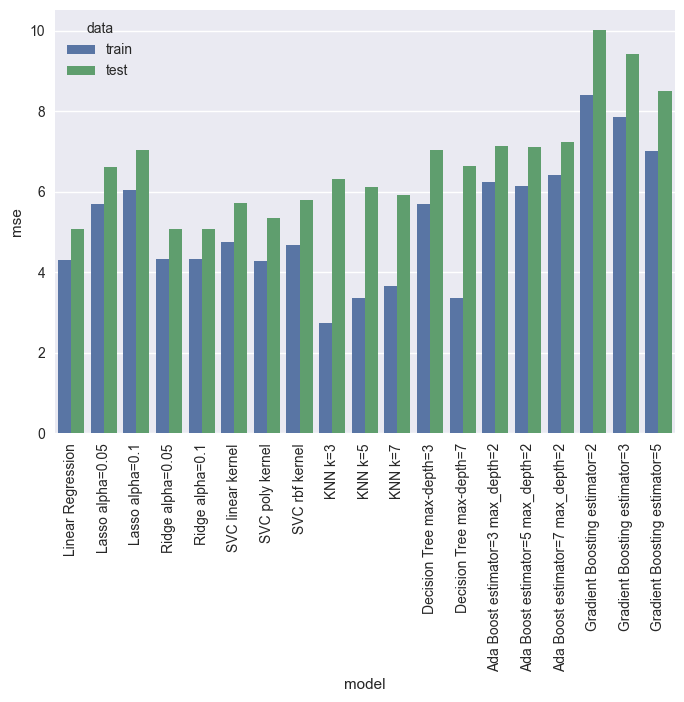

In [161]:
sns.barplot(evaluation_dataset, x='model',y='mse', hue='data')
plt.xticks(rotation = 90)
plt.show()

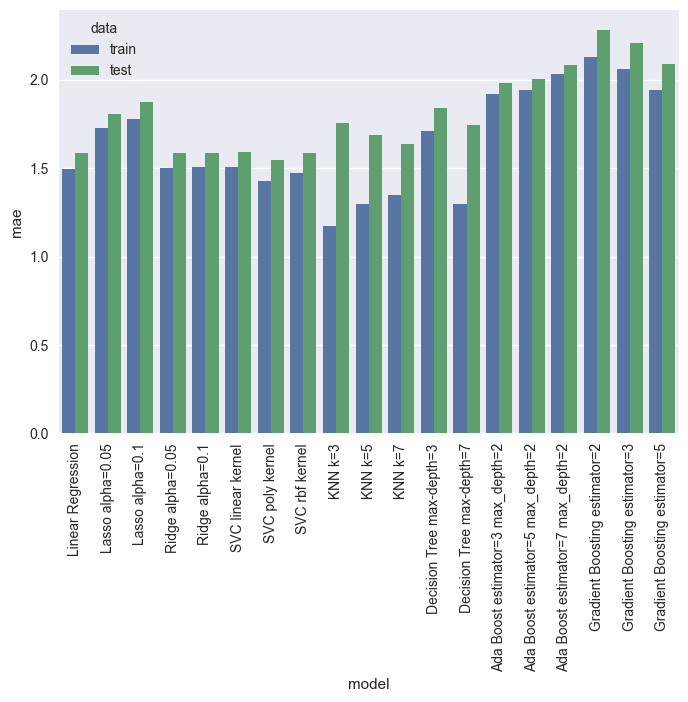

In [162]:
sns.barplot(evaluation_dataset, x='model',y='mae', hue='data')
plt.xticks(rotation = 90)
plt.show()

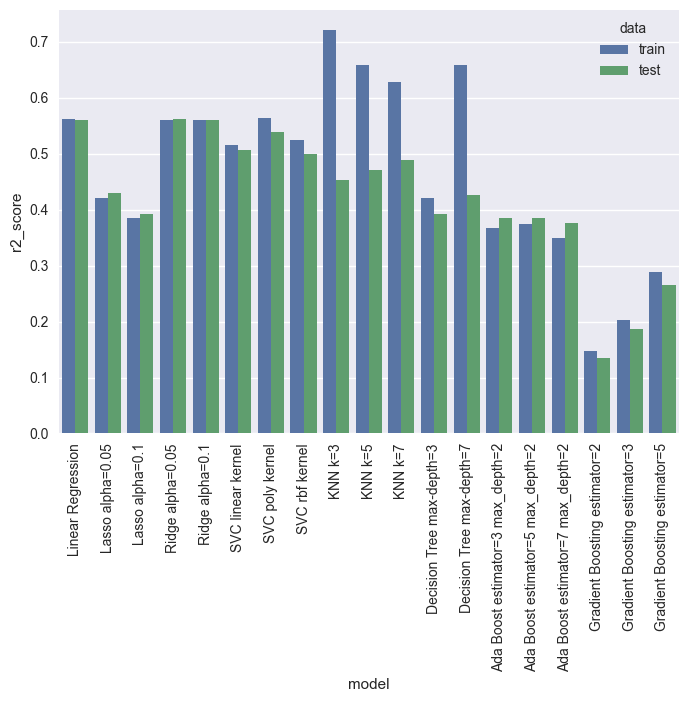

In [163]:
sns.barplot(evaluation_dataset, x='model',y='r2_score', hue='data')
plt.xticks(rotation = 90)
plt.show()

# Caching

metrics

In [164]:
evaluation_dataset.to_csv("eval_dataset.csv")

y vs yhat

In [165]:
CAHCE_Y_VS_Y_HAT_DIR_NAME = 'models_predictions' 
os.makedirs(CAHCE_Y_VS_Y_HAT_DIR_NAME, exist_ok=True)

In [166]:
for model in models_list:
    pad_width = len(y_train) - len(y_test)

    pd.DataFrame(
        {
            'actual Y train' : y_train,
            'predict Y train' : model.y_train_hat,
            'actual Y test' : np.pad(y_test, (0, pad_width), mode='constant'),
            'predict Y test' : np.pad(model.y_test_hat, (0, pad_width), mode='constant'),
        }
    ).to_csv(f"{CAHCE_Y_VS_Y_HAT_DIR_NAME}/{model.name}.csv")

ecoders & scalers

In [167]:
CACHE_ENCODE_SCALE_DIR_NAME = 'encoders_scalers' 
os.makedirs(CACHE_ENCODE_SCALE_DIR_NAME, exist_ok=True)

In [168]:
def save_obj(obj, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(obj, f)        

def load_obj(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

In [169]:
save_obj( min_max_scaller, f"{CACHE_ENCODE_SCALE_DIR_NAME}/min-max-scaler.pickle" )